<a href="https://colab.research.google.com/github/Shashank-gc/info5731/blob/master/ghanta_selfstudy7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

**Preparing the data**

In [0]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv'),
 PosixPath('/root/.fastai/data/imdb_sample/data_save.pkl')]

In [0]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [0]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [0]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [0]:
data_lm.save()

In [0]:
data = load_data(path)

**Tokenization**

In [0]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive


**Numericalization**

In [0]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',']

In [0]:
data.train_ds[0][0]

Text xxbos i am sick and tired of all these little xxunk going on about how this movie " xxunk " . xxmaj it is pure xxup cg over - acted xxup crap ! xxmaj do n't send an xxmaj assassin , it 's much more sensible to xxunk hundreds of xxunk colored , aggressive , xxunk xxmaj snakes on a xxmaj plane ! xxmaj the only reason people like this movie because they feel they have to . xxmaj it is not " so bad it 's good " xxmaj it 's so bad i 'd rather be xxunk in the eye with a sharp stick then be subjected to this again . i honestly thought was going to be a xxup comedy like xxup airplane ! a spoof ! xxmaj was i wrong . xxmaj it 's that whole " xxmaj it sucks , get it ! " xxmaj or xxmaj samuel xxup a. xxmaj jackson yells " xxmaj snakes on the xxmaj plane ! thing . xxmaj well i 'm sorry , i do n't get it . xxmaj it looks like a bunch of xxunk gave the movie industry more money to make more movies like xxmaj triple x and xxmaj die xxmaj hard . xxmaj if you what spend money to watch a movie in th

In [0]:
data.train_ds[0][0].data[:10]

array([   2,   18,  312, 1034,   11, 1843,   13,   45,  144,  134])

**With the data block API**

In [0]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

**Language model**

In [0]:
bs=48

In [0]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/models'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/data_clas.pkl'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/data_lm.pkl'),
 PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas')]

In [0]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/pos')]

In [0]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [0]:
data_lm.show_batch()

idx,text
0,"of the 2 sides to a story and how the lowest rank are always the ones that take the fall . xxmaj nobody above a xxmaj staff xxmaj sargent was ever charged , that 's non - commissioned officer 's . xxmaj imagine that ? ! xxmaj this is a very revealing portrait that shows just how screwed up the military can be in times of war & in general"
1,he is must take into account this personal duty as well as his police duty . xxbos i saw this film and thought it was totally cool . xxmaj finally ... a chic flick without a bunch of wimpy women . xxmaj this is the real stuff girls . xxmaj and guys ... this is what we 're all about . xxmaj thora xxmaj birch was amazing . xxmaj the
2,"civilized people stranded in uncharted jungle where prehistoric creatures and savage tribesmen challenge their wits , their ingenuity & their very concept of civilization ? "" xxmaj lost xxmaj world "" answers that question with a bland script , weak acting , lame props & effects and characters dull enough to be animal feed -- which many of them inevitably wind up as . xxmaj an airliner crashes on the"
3,". a fat , bloated string of nonsensical set pieces that sees such indulgent turns as acting roles for all of xxmaj landis 's director friends , it lurches from one meaningless sequence to the next . xxmaj the behind the scenes documentary xxunk that the writer did n't even know what the criminals would be using an amusement park for until very near the end of the project 's"
4,"however , xxmaj mulder and xxmaj scully quickly discount that he has any such abilities . xxmaj so , why are they still involved ? xxmaj and why is xxmaj melissa even being cooperative ? xxmaj multiple wives in cults are very loyal to their husband . xxmaj she would n't be submitting so easily to their requests . xxmaj every single aspect of xxmaj mulder in this episode is"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


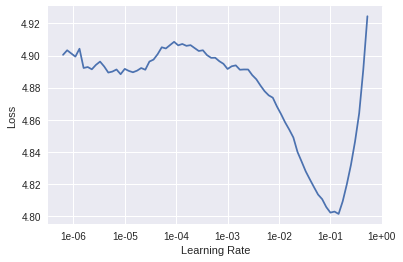

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.175793,4.016118,0.295222,1:15:33


In [0]:
learn.save('fit_head')  

In [0]:
learn.load('fit_head');

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))  ## this command loads 10 epochs each one is taking around 2 hours to execute due to this the kernel is disconnecting. So interupted the kernel execution. due to this i changed the value from 10 to 1

epoch,train_loss,valid_loss,accuracy,time
0,3.914779,3.862238,0.310963,1:24:31


KeyboardInterrupt: ignored

In [0]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked this movie because i thought it was a good movie , and i enjoyed both the Secret Service Agent and President Maxwell Lee . The one thing i love about this movie is that it 's
I liked this movie because it was excellent and i still love it . Its a good drama , very well acted and great . It 's a good movie , i believe it is good . The acting is excellent from


In [0]:
learn.save_encoder('fine_tuned_enc')

**Classifier**

In [0]:
path = untar_data(URLs.IMDB)

In [0]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [0]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj some have praised _ xxunk _ as a xxmaj disney adventure for adults . i do n't think so -- at least not for thinking adults . \n \n xxmaj this script suggests a beginning as a live - action movie , that struck someone as the type of crap you can not sell to adults anymore . xxmaj the "" crack staff "" of many older",neg
"xxbos xxmaj some have praised xxunk :- xxmaj the xxmaj lost xxmaj xxunk as a xxmaj disney adventure for adults . i do n't think so -- at least not for thinking adults . \n \n xxmaj this script suggests a beginning as a live - action movie , that struck someone as the type of crap you can not sell to adults anymore . xxmaj the "" crack",neg
"xxbos xxmaj the premise of this movie has been tickling my imagination for quite some time now . xxmaj we 've all heard or read about it in some kind of con - text . xxmaj what would you do if you were all alone in the world ? xxmaj what would you do if the entire world suddenly disappeared in front of your eyes ? xxmaj in fact ,",pos
"xxbos 8 xxmaj simple xxmaj rules for xxmaj dating xxmaj my xxmaj teenage xxmaj daughter had an auspicious start . xxmaj the supremely - talented xxmaj tom xxmaj shadyac was involved in the project . xxmaj this meant that the comedy would be nothing less of spectacular , and that 's exactly what happened : the show remains one of the freshest , funniest , wittiest shows made in a",pos


In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


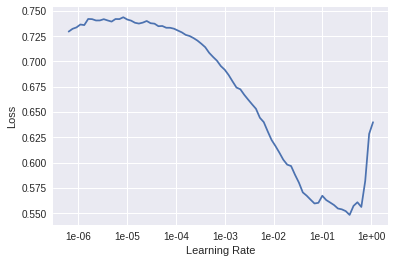

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.364651,0.270045,0.886680,09:46


In [0]:
learn.save('first')

In [0]:
learn.load('first');


In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.316594,0.219095,0.912200,10:09


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.257274,0.182945,0.930840,15:16


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [20]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7)) 

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: ignored

In [18]:
## As we are getting Out of Memory error chaging the input value from 2 to 1
learn.unfreeze()
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.535519,0.472998,0.771000,24:17


In [19]:
learn.predict("I really loved that movie, it was awesome!")

(Category pos, tensor(1), tensor([0.0249, 0.9751]))